In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data.base_stream import Stream
from skmultiflow.utils import check_random_state
%matplotlib inline

In [3]:
categories = [3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 4, 3, 3, 3, 5]

In [4]:
class StreamGenerator(Stream):
    
    episode = 0
    
    def __init__(self, random_state=None, categories=[3, 5, 3, 3, 3, 5, 3, 5, 3, 3, 4, 3, 3, 3, 5], labels=[0, 1], split_1=4, split_2=4):
        
        super().__init__()
        
        self.random_state = random_state
        self._random_state = None  # This is the actual random_state object used internally
        self.categories = categories
        self.n_cat_features = len(categories)
        self.generator = dict([(i, np.full(categories[i], 1/categories[i])) for i in range(len(categories))])
        self.n_targets = 1
        self.split_1 = split_1
        self.split_2 = split_2
        self.n_classes = len(labels)
        self.n_features = self.n_cat_features
        self.name = "Generator"
        self.feature_names = ["att_num_" + str(i) for i in range(self.n_features)]
        self.target_names = ["target_0"]
        self.target_values = [i for i in range(self.n_classes)]
        self._prepare_for_use()
        
    def _prepare_for_use(self):
        
        self._random_state = check_random_state(self.random_state)
            
    def concept_1(self, data_point):
        """
        Description
        --------------
        Define the first labeling concept.
        
        Parameters
        --------------
        data_point : List of length d, the data point to label.
        
        Returns
        --------------
        Int in {0, 1}, the label of the data point.
        """
        
        label = True
        i = 0
        while label and i <= self.n_features-1:
            if data_point[i] >= self.split_1:
                label = False
                
            i += 1
            
        return label
    
    def concept_2(self, data_point):
        """
        Description
        --------------
        Define the second labeling concept.
        
        Parameters
        --------------
        data_point : List of length d, the data point to label.
        
        Returns
        --------------
        Int in {0, 1}, the label of the data point.
        """
        
        label = True
        i = 0
        while label and i <= self.n_features-1:
            if data_point[i] == self.split_2:
                label = False
                
            i += 1
            
        return label

    def next_sample(self, batch_size=1):
           
        data_point = [np.random.choice(self.categories[i], p=self.generator[i]) for i in range(self.n_features)]
        b = np.random.binomial(1, 1/(1 + np.exp(-(self.episode - 5e4)/2e3)))
        if b == 0:
            label = self.concept_1(data_point)
            
        else:
            label = self.concept_2(data_point)
            
        StreamGenerator.episode += 1
        self.current_sample_x, self.current_sample_y = np.array([data_point]), np.array([int(label)])
        return self.current_sample_x, self.current_sample_y
        
        

In [5]:
stream = StreamGenerator(categories=categories, split_1=4, split_2=3)

In [6]:
ht = HoeffdingTreeClassifier()

In [8]:
evaluator = EvaluatePrequential(n_wait=1, batch_size=1000, show_plot=True, pretrain_size=0)

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 -------------------- [0%] [0.00s]

/home/otmane/anaconda3/lib/python3.7/site-packages/skmultiflow/visualization/evaluation_visualizer.py:447: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plot_tracker.sub_plot_obj.set_xlim(0, self._sample_ids[-1])


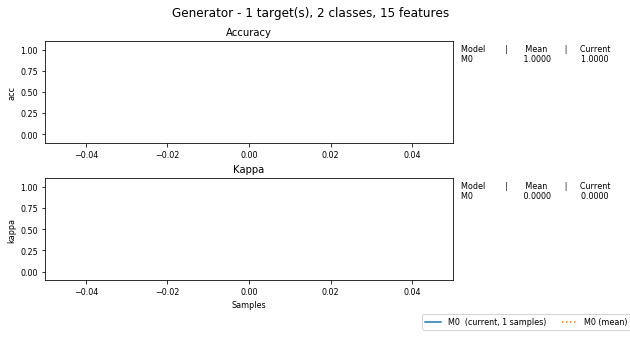

 #------------------- [5%] [0.36s]

<Figure size 432x288 with 0 Axes>

 ##------------------ [10%] [0.39s]

<Figure size 432x288 with 0 Axes>

 ###----------------- [15%] [0.42s]

<Figure size 432x288 with 0 Axes>

 ####---------------- [20%] [0.45s]

<Figure size 432x288 with 0 Axes>

 ######-------------- [30%] [0.51s]

<Figure size 432x288 with 0 Axes>

 #######------------- [35%] [0.54s]

<Figure size 432x288 with 0 Axes>

 ########------------ [40%] [0.58s]

<Figure size 432x288 with 0 Axes>

 #########----------- [45%] [0.61s]

<Figure size 432x288 with 0 Axes>

 ##########---------- [50%] [0.65s]

<Figure size 432x288 with 0 Axes>

 ############-------- [60%] [0.70s]

<Figure size 432x288 with 0 Axes>

 #############------- [65%] [0.73s]

<Figure size 432x288 with 0 Axes>

 ##############------ [70%] [0.76s]

<Figure size 432x288 with 0 Axes>

 ###############----- [75%] [0.80s]

<Figure size 432x288 with 0 Axes>

 ################---- [80%] [0.83s]

<Figure size 432x288 with 0 Axes>

 ##################-- [90%] [0.90s]

<Figure size 432x288 with 0 Axes>

 ###################- [95%] [0.92s]

<Figure size 432x288 with 0 Axes>

 #################### [99%] [0.95s]
Processed samples: 100000
Mean performance:
M0 - Accuracy     : 0.7300
M0 - Kappa        : 0.3836


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [9]:
evaluator.evaluate(stream=stream, model=ht)